In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/nyc_temperatures.csv')
df.head()

,date,datatype,station,attributes,value
0,2018-10-01T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
1,2018-10-01T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2,2018-10-01T00:00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
3,2018-10-02T00:00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
4,2018-10-02T00:00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


### Renaming columns

In [4]:
df.columns

Index(['date', 'datatype', 'station', 'attributes', 'value'], dtype='object')

In [5]:
df.rename(
    columns={'value': 'temp_C',
             'attributes': 'flags'},
             inplace=True  # update the original dataframe
)

In [6]:
df.columns

Index(['date', 'datatype', 'station', 'flags', 'temp_C'], dtype='object')

>   
    rename()
    Both Series and Index objects can also be renamed using their rename() methods. Simply pass in the new name

In [7]:
# we can also do columns transformation with rename()
df.rename(str.upper, axis='columns').columns

Index(['DATE', 'DATATYPE', 'STATION', 'FLAGS', 'TEMP_C'], dtype='object')

### Type conversion

In [8]:
df.dtypes

date         object
datatype     object
station      object
flags        object
temp_C      float64
dtype: object

Note that the date column isn't actually being stored as a datetime

In [9]:
df.date = pd.to_datetime(df.date)

In [10]:
df.dtypes

date        datetime64[ns]
datatype            object
station             object
flags               object
temp_C             float64
dtype: object

In [11]:
# Now, we can get useful information when we summarize the date
# column:
df.date.describe()

count                     93
mean     2018-10-16 00:00:00
min      2018-10-01 00:00:00
25%      2018-10-08 00:00:00
50%      2018-10-16 00:00:00
75%      2018-10-24 00:00:00
max      2018-10-31 00:00:00
Name: date, dtype: object

> 
    When working with a DatetimeIndex object, if we need to keep track of time zones, we can use the `tz_localize()` method to associate our datetimes with a time zone

In [12]:
pd.date_range(start='2018-10-25', periods=2, freq='D') \
              .tz_localize('EST')

DatetimeIndex(['2018-10-25 00:00:00-05:00', '2018-10-26 00:00:00-05:00'], dtype='datetime64[ns, EST]', freq=None)

This also works with Series and DataFrame objects that have an index of type DatetimeIndex

We can read in the CSV file again and, this time, specify that the date column will be our index and that we should parse any dates in the CSV file into
datetimes

In [13]:
eastern = pd.read_csv(
    'data/nyc_temperatures.csv',
    index_col='date', parse_dates=True
    ).tz_localize('EST')

eastern.head()

,datatype,station,attributes,value
date,,,,
2018-10-01 00:00:00-05:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
2018-10-01 00:00:00-05:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2018-10-01 00:00:00-05:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
2018-10-02 00:00:00-05:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
2018-10-02 00:00:00-05:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


We can use the `tz_convert()` method to change the time zone into a different one

In [14]:
eastern.tz_convert('UTC').head()

,datatype,station,attributes,value
date,,,,
2018-10-01 05:00:00+00:00,TAVG,GHCND:USW00014732,"H,,S,",21.2
2018-10-01 05:00:00+00:00,TMAX,GHCND:USW00014732,",,W,2400",25.6
2018-10-01 05:00:00+00:00,TMIN,GHCND:USW00014732,",,W,2400",18.3
2018-10-02 05:00:00+00:00,TAVG,GHCND:USW00014732,"H,,S,",22.7
2018-10-02 05:00:00+00:00,TMAX,GHCND:USW00014732,",,W,2400",26.1


We can also truncate datetimes with the `to_period()` method

In [15]:
eastern.tz_localize(None).to_period('M').index

PeriodIndex(['2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-

We can use the `to_timestamp()` method to convert our PeriodIndex object into a DatetimeIndex object; however, the datetimes all start at the first of the month now

In [16]:
eastern.tz_localize(None) \
    .to_period('M').to_timestamp().index

DatetimeIndex(['2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
      

Alternatively, we can use the `assign()` method to handle any type conversions by passing the column names as named parameters and their new values as the value for that argument to the method call

In [17]:
df = pd.read_csv('data/nyc_temperatures.csv').rename(
        columns={'value': 'temp_C', 'attributes': 'flags'}
)

new_df = df.assign(
    date = pd.to_datetime(df.date),
    temp_F = (df.temp_C * 9/5) + 32
)

In [18]:
new_df.dtypes

date        datetime64[ns]
datatype            object
station             object
flags               object
temp_C             float64
temp_F             float64
dtype: object

In [19]:
new_df.head()

,date,datatype,station,flags,temp_C,temp_F
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,70.16
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,78.08
2,2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,64.94
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,72.86
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,78.98


Additionally, we can use the `astype()` method to convert one column at a time.
 It is very common (and useful) to use `lambda` functions with `assign()`

In [20]:
df = df.assign(
    date = lambda x: pd.to_datetime(x.date),
    temp_c_whole = lambda x: x.temp_C.astype('int'),
    temp_F = lambda x: (x.temp_C * 9/5) + 32,
    temp_F_whole = lambda x: x.temp_F.astype('int')
)
df.head()

,date,datatype,station,flags,temp_C,temp_c_whole,temp_F,temp_F_whole
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
2,2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,18,64.94,64
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78


we don't have to know whether to convert the column into a float or an integer: we can use `pd.to_numeric()`, which will convert the data into
floats if it sees decimals.

> 
    Pandas has the ability to define columns as
    categorical; certain statistical operations both within pandas and other packages will
    be able to handle this data, provide meaningful statistics on them, and use them properly.

In [21]:
df.dtypes

date            datetime64[ns]
datatype                object
station                 object
flags                   object
temp_C                 float64
temp_c_whole             int64
temp_F                 float64
temp_F_whole             int64
dtype: object

In [22]:
df_with_categories = df.assign(
    station = df.station.astype('category'),
    datatype = df.datatype.astype('category')
)

df_with_categories.dtypes

date            datetime64[ns]
datatype              category
station               category
flags                   object
temp_C                 float64
temp_c_whole             int64
temp_F                 float64
temp_F_whole             int64
dtype: object

In [23]:
df_with_categories.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
date,93,NaN,NaN,NaN,2018-10-16 00:00:00,2018-10-01 00:00:00,2018-10-08 00:00:00,2018-10-16 00:00:00,2018-10-24 00:00:00,2018-10-31 00:00:00,NaN
datatype,93,3,TAVG,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
station,93,1,GHCND:USW00014732,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flags,93,2,",,W,2400",62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temp_C,93.0,NaN,NaN,NaN,15.408602,5.6,10.2,14.4,21.1,27.8,6.133703
temp_c_whole,93.0,NaN,NaN,NaN,14.956989,5.0,10.0,14.0,21.0,27.0,6.084396
temp_F,93.0,NaN,NaN,NaN,59.735484,42.08,50.36,57.92,69.98,82.04,11.040666
temp_F_whole,93.0,NaN,NaN,NaN,59.215054,42.0,50.0,57.0,69.0,82.0,11.128547


The categories we just made don't have any order to them, but pandas does support this

In [24]:
pd.Categorical(
    ['med', 'med', 'low', 'high'],
    categories = ['low', 'med', 'high'],
    ordered=True
)

['med', 'med', 'low', 'high']
Categories (3, object): ['low' < 'med' < 'high']

### Reordering, reindexing, and sorting data

Say we wanted to find the days that reached the highest temperatures in New York City during October 2018; we could sort our values by the temp_C (or temp_F) column in descending order and use head() to select the number of days we wanted to see. To accomplish this, we can use the `sort_values()` method.

In [25]:
df[df.datatype == 'TMAX']\
    .sort_values(by='temp_C', ascending=False)\
    .head(10)

,date,datatype,station,flags,temp_C,temp_c_whole,temp_F,temp_F_whole
19,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
28,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
31,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
10,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
25,2018-10-09,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
7,2018-10-03,TMAX,GHCND:USW00014732,",,W,2400",25.0,25,77.00,77
13,2018-10-05,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73
22,2018-10-08,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73


The order in which the columns are provided will determine the sort order, with each subsequent column being used to break ties.

In [26]:
df[df.datatype == 'TMAX']\
    .sort_values(by=['temp_C', 'date'], ascending=False)\
    .head(10)

,date,datatype,station,flags,temp_C,temp_c_whole,temp_F,temp_F_whole
28,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
19,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
31,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
10,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
25,2018-10-09,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
1,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
7,2018-10-03,TMAX,GHCND:USW00014732,",,W,2400",25.0,25,77.00,77
22,2018-10-08,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73
13,2018-10-05,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73


Since we are sorting in ascending order, in the case of a tie, the date that comes earlier in
the year will be above the later one.

we can pass `ignore_index=True` to `sort_values()` and create a fresh new index

In [27]:
df[df.datatype == 'TMAX']\
    .sort_values(by=['temp_C', 'date'], ascending=False, ignore_index=True)\
    .head(10)

,date,datatype,station,flags,temp_C,temp_c_whole,temp_F,temp_F_whole
0,2018-10-10,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
1,2018-10-07,TMAX,GHCND:USW00014732,",,W,2400",27.8,27,82.04,82
2,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
3,2018-10-04,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
4,2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
5,2018-10-09,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
6,2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
7,2018-10-03,TMAX,GHCND:USW00014732,",,W,2400",25.0,25,77.00,77
8,2018-10-08,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73
9,2018-10-05,TMAX,GHCND:USW00014732,",,W,2400",22.8,22,73.04,73


We can use `nlargest()` to grab the n rows with the largest values according to specific criteria and `nsmallest()` to grab the n smallest rows, without the need to sort the data beforehand.

In [28]:
df[df.datatype == 'TAVG'].nlargest(n=10, columns='temp_C')

,date,datatype,station,flags,temp_C,temp_c_whole,temp_F,temp_F_whole
27,2018-10-10,TAVG,GHCND:USW00014732,"H,,S,",23.8,23,74.84,74
30,2018-10-11,TAVG,GHCND:USW00014732,"H,,S,",23.4,23,74.12,74
18,2018-10-07,TAVG,GHCND:USW00014732,"H,,S,",22.8,22,73.04,73
3,2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
6,2018-10-03,TAVG,GHCND:USW00014732,"H,,S,",21.8,21,71.24,71
24,2018-10-09,TAVG,GHCND:USW00014732,"H,,S,",21.8,21,71.24,71
9,2018-10-04,TAVG,GHCND:USW00014732,"H,,S,",21.3,21,70.34,70
0,2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
21,2018-10-08,TAVG,GHCND:USW00014732,"H,,S,",20.9,20,69.62,69
12,2018-10-05,TAVG,GHCND:USW00014732,"H,,S,",20.3,20,68.54,68


In [29]:
df[df.datatype == 'TAVG'].nsmallest(n=10, columns='temp_C')

,date,datatype,station,flags,temp_C,temp_c_whole,temp_F,temp_F_whole
75,2018-10-26,TAVG,GHCND:USW00014732,"H,,S,",7.3,7,45.14,45
63,2018-10-22,TAVG,GHCND:USW00014732,"H,,S,",8.3,8,46.94,46
72,2018-10-25,TAVG,GHCND:USW00014732,"H,,S,",8.8,8,47.84,47
78,2018-10-27,TAVG,GHCND:USW00014732,"H,,S,",9.4,9,48.92,48
51,2018-10-18,TAVG,GHCND:USW00014732,"H,,S,",9.6,9,49.28,49
81,2018-10-28,TAVG,GHCND:USW00014732,"H,,S,",10.2,10,50.36,50
87,2018-10-30,TAVG,GHCND:USW00014732,"H,,S,",10.2,10,50.36,50
60,2018-10-21,TAVG,GHCND:USW00014732,"H,,S,",10.7,10,51.26,51
69,2018-10-24,TAVG,GHCND:USW00014732,"H,,S,",11.0,11,51.80,51
54,2018-10-19,TAVG,GHCND:USW00014732,"H,,S,",11.3,11,52.34,52


We aren't limited to sorting values; if we wish, we can even order the columns alphabetically and sort the rows by their index values. For these tasks, we can use the
`sort_index()` method.

In [30]:
df.sample(5, random_state=0).index

Index([2, 30, 55, 16, 13], dtype='int64')

In [31]:
df.sample(5, random_state=0).sort_index().index

Index([2, 13, 16, 30, 55], dtype='int64')

When we want to target columns, we must pass in axis=1; rows will be the default (axis=0)

In [32]:
df.sort_index(axis=1).head()

,datatype,date,flags,station,temp_C,temp_F,temp_F_whole,temp_c_whole
0,TAVG,2018-10-01,"H,,S,",GHCND:USW00014732,21.2,70.16,70,21
1,TMAX,2018-10-01,",,W,2400",GHCND:USW00014732,25.6,78.08,78,25
2,TMIN,2018-10-01,",,W,2400",GHCND:USW00014732,18.3,64.94,64,18
3,TAVG,2018-10-02,"H,,S,",GHCND:USW00014732,22.7,72.86,72,22
4,TMAX,2018-10-02,",,W,2400",GHCND:USW00014732,26.1,78.98,78,26


Using `loc[]` we can specify a range of columns with similar names

In [33]:
df.loc[:, 'station':'temp_F_whole']

,station,flags,temp_C,temp_c_whole,temp_F,temp_F_whole
0,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
1,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
2,GHCND:USW00014732,",,W,2400",18.3,18,64.94,64
3,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
4,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78
...,...,...,...,...,...,...
88,GHCND:USW00014732,",,W,2400",13.9,13,57.02,57
89,GHCND:USW00014732,",,W,2400",7.2,7,44.96,44
90,GHCND:USW00014732,"H,,S,",12.6,12,54.68,54
91,GHCND:USW00014732,",,W,2400",17.8,17,64.04,64


>
    Both `sort_index()` and `sort_values()` return new DataFrame objects. We must pass in inplace=True to update the dataframe we are working with.

The sort_index() method can also help us get an accurate answer when we're testing two dataframes for equality

In [34]:
df.equals(df.sort_values(by='temp_C'))

False

In [35]:
df.equals(df.sort_values(by='temp_C').sort_index())

True

If we want to use one (or more) columns as the index, we can use the `set_index()` method

In [36]:
df.set_index('date', inplace=True)
df.head()

,datatype,station,flags,temp_C,temp_c_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-01,TAVG,GHCND:USW00014732,"H,,S,",21.2,21,70.16,70
2018-10-01,TMAX,GHCND:USW00014732,",,W,2400",25.6,25,78.08,78
2018-10-01,TMIN,GHCND:USW00014732,",,W,2400",18.3,18,64.94,64
2018-10-02,TAVG,GHCND:USW00014732,"H,,S,",22.7,22,72.86,72
2018-10-02,TMAX,GHCND:USW00014732,",,W,2400",26.1,26,78.98,78


`loc[]` is optional when using ranges

In [37]:
df['2018-10-11':'2018-10-12']

,datatype,station,flags,temp_C,temp_c_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-11,TAVG,GHCND:USW00014732,"H,,S,",23.4,23,74.12,74
2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
2018-10-11,TMIN,GHCND:USW00014732,",,W,2400",21.7,21,71.06,71
2018-10-12,TAVG,GHCND:USW00014732,"H,,S,",18.3,18,64.94,64
2018-10-12,TMAX,GHCND:USW00014732,",,W,2400",22.2,22,71.96,71
2018-10-12,TMIN,GHCND:USW00014732,",,W,2400",12.2,12,53.96,53


We can use the `reset_index()` method to restore the date column

In [38]:
df['2018-10-11':'2018-10-12'].reset_index()

,date,datatype,station,flags,temp_C,temp_c_whole,temp_F,temp_F_whole
0,2018-10-11,TAVG,GHCND:USW00014732,"H,,S,",23.4,23,74.12,74
1,2018-10-11,TMAX,GHCND:USW00014732,",,W,2400",26.7,26,80.06,80
2,2018-10-11,TMIN,GHCND:USW00014732,",,W,2400",21.7,21,71.06,71
3,2018-10-12,TAVG,GHCND:USW00014732,"H,,S,",18.3,18,64.94,64
4,2018-10-12,TMAX,GHCND:USW00014732,",,W,2400",22.2,22,71.96,71
5,2018-10-12,TMIN,GHCND:USW00014732,",,W,2400",12.2,12,53.96,53


Let's see what our data looks like and mark the day of the week for each row in order to understand what the index contains. We can easily isolate the date part from an index
of type `DatetimeIndex`. When isolating date parts, pandas will give us the numeric representation of what we are looking for.

In [39]:
sp = pd.read_csv(
    'data/sp500.csv', index_col='date', parse_dates=True
).drop(columns=['adj_close']) # not using this column

In [40]:
sp.head()

,high,low,open,close,volume
date,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000


In [41]:
sp.head()\
    .assign(day_of_week = lambda x: x.index.day_name())

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,Friday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,Monday


### Analyzing the performance of a group of assets

In [42]:
bitcoin = pd.read_csv(
    'data/bitcoin.csv', index_col='date',
    parse_dates=True
).drop(columns=['market_cap'])
bitcoin.head()

,open,high,low,close,volume
date,,,,,
2017-01-01,963.66,1003.08,958.70,998.33,147775008
2017-01-02,998.62,1031.39,996.70,1021.75,222184992
2017-01-03,1021.60,1044.08,1021.60,1043.84,185168000
2017-01-04,1044.40,1159.42,1044.40,1154.73,344945984
2017-01-05,1156.73,1191.10,910.42,1013.38,510199008


To analyze the portfolio, we will need to aggregate the data by day

In [48]:
portfolio = pd.concat([sp, bitcoin], sort=False)\
    .groupby(level='date').sum()

In [49]:
portfolio.head(10).assign(
    day_of_week = lambda x: x.index.day_name()
)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,1003.080000,958.700000,963.660000,998.330000,147775008,Sunday
2017-01-02,1031.390000,996.700000,998.620000,1021.750000,222184992,Monday
2017-01-03,3307.959883,3266.729883,3273.170068,3301.670078,3955698000,Tuesday
2017-01-04,3432.240068,3306.000098,3306.000098,3425.480000,4109835984,Wednesday
2017-01-05,3462.600000,3170.869951,3424.909932,3282.380000,4272019008,Thursday
2017-01-06,3328.910098,3148.000059,3285.379893,3179.179980,3691766000,Friday
2017-01-07,908.590000,823.560000,903.490000,908.590000,279550016,Saturday
2017-01-08,942.720000,887.250000,908.170000,911.200000,158715008,Sunday
2017-01-09,3189.179990,3148.709902,3186.830088,3171.729902,3359486992,Monday


S&P only happens on weekdays, but bitcoins happens on weekends too.

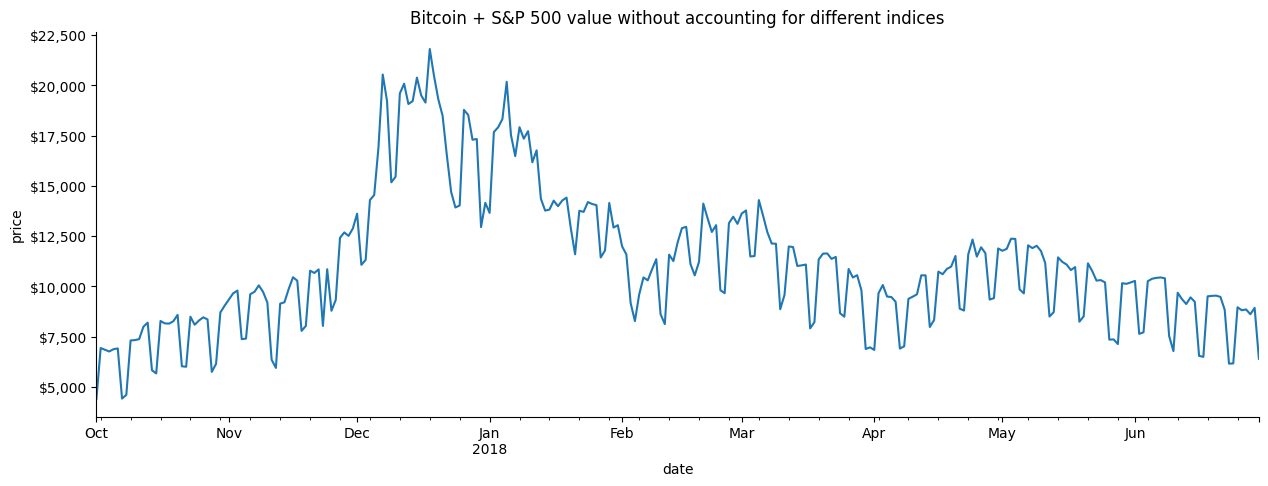

In [52]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# plot the closing price from Q4 2017 through Q2 2018
ax = portfolio['2017-Q4':'2018-Q2'].plot(
    y='close', figsize=(15, 5), legend=False,
    title='Bitcoin + S&P 500 value without accounting '
    'for different indices'
)

# formatting
ax.set_ylabel('price')
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# show the plot
plt.show()

There is a cyclical pattern here: It is dropping every day the market is closed because the aggregation only had bitcoin data to sum for those days. This is a problem; an asset's value doesn't drop to zero whenever the market is
closed

### reindex() method
to fill the missing values:
- 'ffill': This method brings values forward. In the previous example, this fills the days the market was closed with the data for the last time the market was open before those days.

- 'bfill': This method backpropagates the values, which will result in carrying future results to past dates, meaning that this isn't the right option here.

- 'nearest': This method fills according to the rows closest to the missing ones, which in this case will result in Sundays getting the data for the following Mondays, and Saturdays getting the data from the previous Fridays.

In [53]:
sp.reindex(bitcoin.index, method='ffill').head(10)\
    .assign(day_of_week=lambda x: x.index.day_name())

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,Sunday
2017-01-02,NaN,NaN,NaN,NaN,NaN,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Saturday
2017-01-08,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


Well, the volume traded (volume) column makes it seem like
the days we used forward-filling for are actually days when the market is open

### Vectorized operations
are performed on all the elements in the array at once; since
each element has the same data type, these calculations can be run rather quickly. As a general rule of thumb, with pandas, we should avoid writing loops in favor of vectorized operations for better performance.

In [55]:
import numpy as np

sp_reindexed = sp.reindex(bitcoin.index).assign(
    # volume is 0 when the market is closed
    volume = lambda x: x.volume.fillna(0),
    # carry this forward
    close = lambda x: x.close.fillna(method='ffill'),
    # take the closing price if these aren't available
    open = lambda x: \
        np.where(x.open.isnull(), x.close, x.open),
    high=lambda x: \
        np.where(x.high.isnull(), x.close, x.high),
    low = lambda x: np.where(x.low.isnull(), x.close, x.low)        
    
)

/tmp/ipykernel_35588/138280418.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  close = lambda x: x.close.fillna(method='ffill'),


In [56]:
sp_reindexed.head(10).assign(
    day_of_week=lambda x: x.index.day_name()
)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,0.000000e+00,Sunday
2017-01-02,NaN,NaN,NaN,NaN,0.000000e+00,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,2276.979980,2276.979980,2276.979980,2276.979980,0.000000e+00,Saturday
2017-01-08,2276.979980,2276.979980,2276.979980,2276.979980,0.000000e+00,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


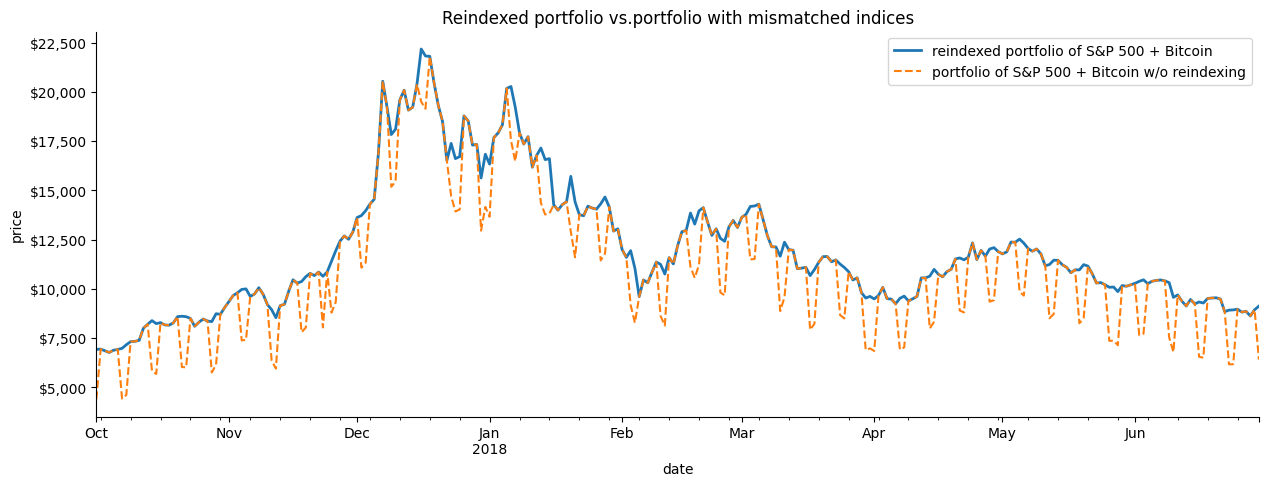

In [57]:
# every day's closing price = S&P 500 close adjusted for
# market closure + Bitcoin close (same for other metrics)
fixed_portfolio = sp_reindexed + bitcoin
# plot the reindexed portfolio's close (Q4 2017 - Q2 2018)
ax = fixed_portfolio['2017-Q4':'2018-Q2'].plot(
    y='close', figsize=(15, 5), linewidth=2,
    label='reindexed portfolio of S&P 500 + Bitcoin',
    title='Reindexed portfolio vs.'
    'portfolio with mismatched indices'
)
# add line for original portfolio for comparison
portfolio['2017-Q4':'2018-Q2'].plot(
    y='close', ax=ax, linestyle='--',
    label='portfolio of S&P 500 + Bitcoin w/o reindexing'
)
# formatting
ax.set_ylabel('price')
ax.yaxis\
    .set_major_formatter(StrMethodFormatter('${x:,.0f}'))
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
# show the plot
plt.show()